<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/CNN_money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [40]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [41]:
x_train = train_path = '/content/drive/MyDrive/Money/Tien/test'
x_test = test_path = '/content/drive/MyDrive/Money/Tien/train'

In [42]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224), batch_size=10, 
                                            class_mode='categorical')

validation_dataset = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 94 images belonging to 11 classes.
Found 114 images belonging to 11 classes.


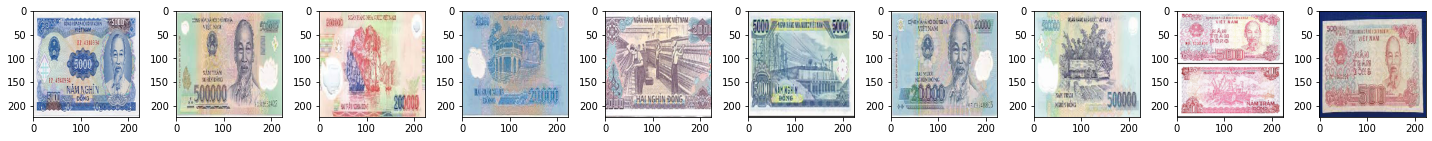

In [43]:
imgs, labels = next(validation_dataset)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [44]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),
                   
                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=11, activation='softmax') ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 128)     

In [48]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
                    validation_data=validation_dataset, epochs=30, verbose=1)

Epoch 1/30
10/10 [==============================] - 2s 133ms/step - loss: 1.2825 - accuracy: 0.5745 - val_loss: 1.4834 - val_accuracy: 0.5614
Epoch 2/30
10/10 [==============================] - 1s 120ms/step - loss: 0.9604 - accuracy: 0.6489 - val_loss: 1.9385 - val_accuracy: 0.6140
Epoch 3/30
10/10 [==============================] - 1s 118ms/step - loss: 0.6839 - accuracy: 0.7660 - val_loss: 1.3840 - val_accuracy: 0.7105
Epoch 4/30
10/10 [==============================] - 1s 115ms/step - loss: 0.5709 - accuracy: 0.7872 - val_loss: 1.1487 - val_accuracy: 0.6930
Epoch 5/30
10/10 [==============================] - 1s 116ms/step - loss: 0.4436 - accuracy: 0.8617 - val_loss: 1.1290 - val_accuracy: 0.8421
Epoch 6/30
10/10 [==============================] - 1s 112ms/step - loss: 0.2593 - accuracy: 0.9043 - val_loss: 0.9692 - val_accuracy: 0.8684
Epoch 7/30
10/10 [==============================] - 1s 117ms/step - loss: 0.2213 - accuracy: 0.9362 - val_loss: 1.1678 - val_accuracy: 0.8947
Epoch 

In [49]:
from tensorflow.keras.models import load_model
model.save('CNN-money.h5')
model_CNN = load_model('CNN-money.h5')

['20000 đồng']


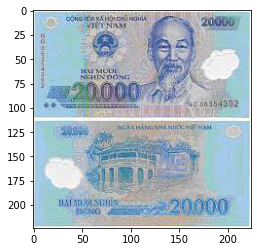

In [50]:
sample = load_img('/content/drive/MyDrive/Money/Tien/test/20000 đồng/download (10).jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255
result = np.argmax(model_CNN.predict(sample),axis= 1)
key = [k for k, v in validation_dataset.class_indices.items() if v == result]
print(key)

['1000 đồng']


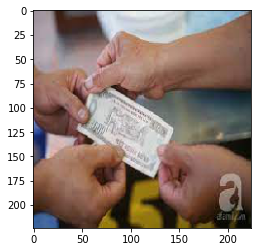

In [53]:
sample = load_img('/content/download (2).jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255
result = np.argmax(model_CNN.predict(sample),axis= 1)
key = [k for k, v in validation_dataset.class_indices.items() if v == result]
print(key)